### **Descripcón:**

Esta es la consolda de una función procesa un archivo GPX y un archivo GeoJSON, y aplica un buffer a los datos del GeoJSON.
    
**Parámetros:**

- gpx_path (str): La ruta del archivo GPX.
- geojson_path (str): La ruta del archivo GeoJSON.
- buffer_size (float): El tamaño del buffer a aplicar a los datos del GeoJSON en metros.
    
**Retorna:**

- Directorios: Por cada filtro produce una carpeta que contiene los resultados de la funcion.
- GeoDataFrame: Por cada uno de los filtros establecidos el programa retorna un GeoDataFrame con los resultados de la unión espacial entre los puntos del GPX y los datos del GeoJSON con buffer.
- Grafico: Por cada filtro se crea un grafico con la union espacial que se realizo
    
### Ejemplo de uso:



##### 1. Importar librerias y funciones

In [12]:
# Importar librerias
import gpxpy as gpxpy
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import os
import sys  # Asegúrate de importar el módulo sys

# Importar funciones del programa
working_directory = r"D:/Bikelane_CNN/Functions"
os.chdir(working_directory)
print("Current Working Directory:", os.getcwd())
sys.path.append(working_directory)

# Importar la función correctamente sin la extensión .py
from geo_sampler_2_0 import gpx_geojson_loader
from geo_sampler_2_0 import filter_gpx_data

Current Working Directory: D:\Bikelane_CNN\Functions


##### 2. Cargar archivos y establecer directorio de resultados

In [2]:
#Data sets
geojson_path = r"D:/Bikelane_CNN/Data/33 pocuro.geojson"
gpx_path = r"D:/Bikelane_CNN/Data/EO_1.gpx"
mp4_path = r"C:/Bikelane_CNN/Data/EO_1.mp4"

##### 3. Parametros

In [8]:
# Conditions to filter , name of the file output
conditions = [
    ("df['ci_o_cr'] == 0","ci_o_cr_0"),
    ("df['ci_o_cr'] == 1","ci_o_cr_1"),
    ("(df['ci_o_cr'] == 0) & (df['senalzd'] == 1)","ci_o_cr_1_senalzd_1"),
    ("(df['ci_o_cr'] == 0) & (df['senalzd'] == 2)","ci_o_cr_1_senalzd_2"),
    ("(df['ci_o_cr'] == 0) & (df['senalzd'] == 3)","ci_o_cr_1_senalzd_3"),
    ("df['tipci'] == 'CA'","tipci_CA"),
    ("df['tipci'] == 'PAR'","tipci_PAR"),
    ("df['tipci'] == 'VD'","tipci_VD"),
    ("df['tipci'] == 'BAND'","tipci_BAND"),
    ("df['op_ci'] == 0","op_ci_0"),
    ("df['op_ci'] == 1","op_ci_1")
]

buffer_size = 10

##### 4. Llamada

In [9]:
geo_gpx_df, geojson_df = gpx_geojson_loader(gpx_path, geojson_path)

# Now you can use geo_gpx_df and geojson_df as needed
print(geo_gpx_df.head())
print(geojson_df.head())


DataFrame with 'time' column:
    latitude  longitude                        timestamp  \
0 -33.425957 -70.577241 2022-04-02 15:15:30.537000+00:00   
1 -33.425957 -70.577241 2022-04-02 15:15:30.709000+00:00   
2 -33.425957 -70.577242 2022-04-02 15:15:30.858000+00:00   
3 -33.425957 -70.577242 2022-04-02 15:15:31.008000+00:00   
4 -33.425957 -70.577242 2022-04-02 15:15:31.158000+00:00   

                      geometry   time  
0  POINT (-70.57724 -33.42596)  0.000  
1  POINT (-70.57724 -33.42596)  0.172  
2  POINT (-70.57724 -33.42596)  0.321  
3  POINT (-70.57724 -33.42596)  0.471  
4  POINT (-70.57724 -33.42596)  0.621  
    latitude  longitude                        timestamp  \
0 -33.425957 -70.577241 2022-04-02 15:15:30.537000+00:00   
1 -33.425957 -70.577241 2022-04-02 15:15:30.709000+00:00   
2 -33.425957 -70.577242 2022-04-02 15:15:30.858000+00:00   
3 -33.425957 -70.577242 2022-04-02 15:15:31.008000+00:00   
4 -33.425957 -70.577242 2022-04-02 15:15:31.158000+00:00   

       

Este es la columna filtro: geojson_df['ci_o_cr'] == 0
Largo de resultado: 24


D:\Bikelane_CNN\Functions\geo_sampler_2_0.py:104: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


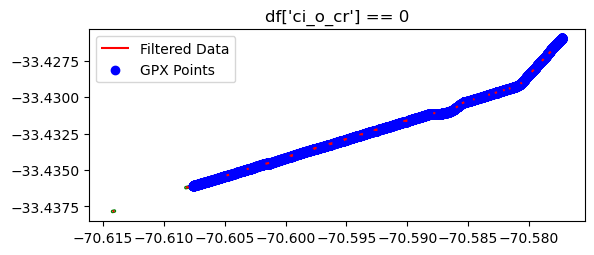

Largo data filtrada: 24


AttributeError: 'tuple' object has no attribute 'empty'

In [13]:
output_folder = "filtered_data"
os.makedirs(output_folder, exist_ok=True)

for condition, folder_name in conditions:
    filtered_gpx_data = filter_gpx_data(geo_gpx_df,geojson_df,condition,buffer_size)

    # Skip this iteration if filtered_gpx_data is None or empty
    if filtered_gpx_data is None or filtered_gpx_data.empty:
        print(f"No data found for condition: {condition}. Skipping this iteration.")
        continue

    folder_path = os.path.join(output_folder, folder_name)
    os.makedirs(folder_path, exist_ok=True)
    output_file = os.path.join(folder_path, f"{folder_name}.geojson")
    filtered_gpx_data.to_file(output_file, driver='GeoJSON')
    print(f"Filtered data saved to {output_file}")